### 데이터 불러오기 ( 및 넘파이 불러오기 ) <br>
http://bit.ly/perch_data

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 훈련 세트와 테스트 세트로 나누기 ( 특성 데이터는 2차원 배열로 바꾸기 )

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [8]:
print(train_input.shape, train_input.dtype)
print(test_input.shape, test_input.dtype)

(42, 1) float64
(14, 1) float64


### 50cm의 농어 예측하기 및 훈련 세트와 사례를 산점도로 표현하기

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.n_neighbors = 3

In [22]:
knr.fit(train_input, train_target)
new = [50, knr.predict([[50]])]
print(new[1])

[1033.33333333]


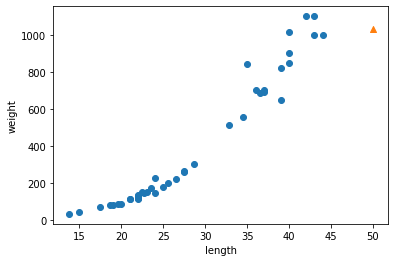

In [17]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(new[0], new[1], marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 최근접 이웃 샘플들의 무게 평균 구하기

In [18]:
distances, indexes = knr.kneighbors([[50]])

In [19]:
print(np.mean(train_target[indexes]))

1033.3333333333333


### 100cm의 농어 예측하고 훈련 세트와 함께 산점도로 표현하기

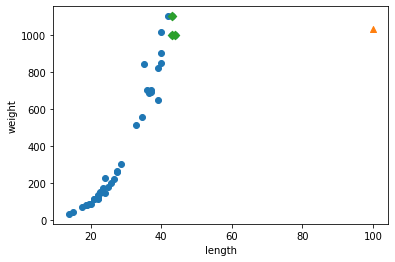

In [23]:
plt.scatter(train_input, train_target)
plt.scatter(100, knr.predict([[100]]), marker="^")
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 선형회귀 불러와 훈련 세트로 훈련하고 50cm의 사례 에측하기

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


### y = ax + b 에서 a와 b 값 구하기

In [26]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


### 훈련 세트의 산점도와 함께 1차 방정식 표현하기

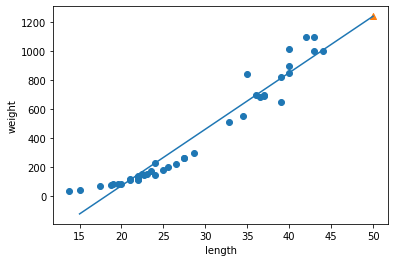

In [31]:
plt.scatter(train_input, train_target)
plt.scatter(50,lr.predict([[50]]), marker="^")
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 훈련 세트와 테스트 세트의 점수 구하기

In [34]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


### 다항 회귀(2차방정식)를 위해 훈련 세트 데이터 수정하기

In [37]:
train_poly = np.column_stack((train_input**2 , train_input))
test_poly = np.column_stack((test_input**2, test_input))

### 새롭게 만든 데이터셋의 형태 표시하기

In [38]:
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


### 새롭게 만든 데이터셋으로 선형회귀모델 훈련하고 50cm의 농어 데이터 무게 예측하기

In [42]:
lr.fit(train_poly, train_target)
new = [50, lr.predict([[2500,50]])]

### y = ax^2 + bx + c 에서 a , b , c 값 구하기

In [43]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


### 데이터 산점도 와 함께 2차선형방정식 , 50cm의 농어 사례 표현하기

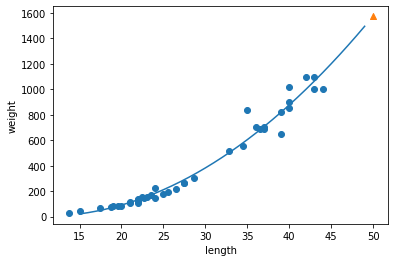

In [51]:
#구간별 직선 만든다.
point = np.arange(15,50)

plt.scatter(train_poly[:,1], train_target)
plt.scatter(50, lr.predict([[2500,50]]), marker="^")
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()